<a id="top"></a>
# Team RM4 Unsupervised Predict Notebook

**Team Members:** Bulelani Nkosi, Lizette Loubser, Nelisiwe Phiwe Mabanga, Noluthando Khumalo, Nompilo Nhlabathi, Sizwe Bhembe  
**Supervisor:** Ridha Moosa

* [Notebook repo](https://github.com/Lizette95/Team_RM4_UnsupervisedPredict)
* [Streamlit repo](https://github.com/Lizette95/unsupervised-predict-streamlit-template)
* [Trello board](https://trello.com/b/1xeVg7gj/unsupervisedteamrm4) 

### Table of Contents
---
1. [Introduction](#intro)
 * Background
 * Problem Statement
---
2. [Load Dependencies](#imports)
---
3. [Data Cleaning](#cleaning)
---
4. [Exploratory Data Analysis](#EDA)
---
5. [Data Preprocessing](#preprocessing)
---
6. [Modelling](#modelling)
---
7. [Performance Evaluation](#evaluation)
---
8. [Model Analysis](#analysis)
---
9. [Conclusion](#conclusion)
---
10. [References](#references)
---
11. [Save Output](#save)
--- 

<a id="intro"></a>
## 1. Introduction  

### Background

In today's technology driven world, recommender systems are critical to ensuring users can make appropriate decisions about the content they engage with daily.

Recommender systems help users select similar items when something is being chosen online. Netflix or Amazon would suggest different movies and titles that might interest individual users. In education, these systems may be used to suggest learning material that could improve educational outcomes. These types of algorithms lead to service improvement and customer satisfaction.

Current recommendation systems - content-based filtering and collaborative  filtering - use difference information sources to make recommendations [1](#ref1).

#### Content-based filtering

This method makes recommendations based on user preferences for product features. It is able to recommend new items, but is limited by the need for more data of user preference to improve the quality of recommendations.

#### Collaborative filtering

Collaborative filtering mimics user-to-user recommendations. In other words, If you and your friend have similar tastes, you are likely to make recommendations the other would approve of. This method finds similar users and predicts their preferences as a linear, weighted combination of other user preferences. The limitation is the requirement of a large dataset with active useres who rated a product before in order to make accurate predictions.

#### Hybrid systems

A combination of these two recommendations systems is called a hybrid system. They mix the features of the item itself and the preferences of other users [2](#ref2).

### Problem Statement
Construct a recommendation algorithm based on contemnt or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences



<a id="imports"></a>
## 2. Load Dependencies

### Connecting to Comet

In [ ]:
# Link workspace to Comet experiment
# !pip install comet_ml
# from comet_ml import Experiment
# experiment = Experiment(api_key="skTy61Bw2NfYh84G1ifx0OO26", project_name="unsupervised-predict", workspace="jhb-rm4")

### Libriaries

In [2]:
# Ignore warnings
import warnings
warnings.simplefilter(action='ignore')

# Install Prerequisites
import sys
import nltk
# !{sys.executable} -m pip install bs4 lxml wordcloud scikit-learn scikit-plot
# nltk.download('vader_lexicon')

# Exploratory Data Analysis
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing

# Models

# Performance Evaluation

# Display
%matplotlib inline
sns.set(font_scale=1)
sns.set_style("white")
pd.set_option('display.max_columns', 37)

### Data

#### Train and test data:
This is the data used for training and Kaggle submission purposes. The rating is the target variable.

In [ ]:
train_df = pd.read_csv('../../edsa-recommender-system-predict/train.csv')
test_df = pd.read_csv('../../edsa-recommender-system-predict/test.csv')
samp = pd.read_csv('../../edsa-recommender-system-predict/sample_submission.csv')
print(train_df.shape, test_df.shape)
train_df.head(3)

(10000038, 4) (5000019, 2)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539


It is noted that the train data includes an additiona column "timestamp" This data can be safely dropped as there is no reasonable link between the time someone watches a movie and whether or not they rate it favourably.

#### Movie Data:

In [ ]:
movies_df =  pd.read_csv('../../edsa-recommender-system-predict/movies.csv', index_col='movieId')
imdb_df =  pd.read_csv('../../edsa-recommender-system-predict/imdb_data.csv', index_col='movieId')
links_df =  pd.read_csv('../../edsa-recommender-system-predict/links.csv', index_col='movieId')
genome_scores =  pd.read_csv('../../edsa-recommender-system-predict/genome_scores.csv', index_col='movieId')
genome_tags =  pd.read_csv('../../edsa-recommender-system-predict/genome_tags.csv', index_col='tagId')
print(movies_df.shape, imdb_df.shape, links_df.shape, genome_scores.shape, genome_tags.shape)

(62423, 2) (27278, 5) (62423, 2) (15584448, 2) (1128, 1)


### Data Definitions

**Numeric**
* **budget:** - (continuous) dollar cost of production of the movie.
* **rating:** - (discrete) users rating of a movie from. **TARGET**
* **relevance:** - (continuous) measure (0-1) of the relevance of a genome tag to the movie, where 1 impies 100% relevance.
* **runtime:** - (continuos) movie duration in minutes.
* **timestamp:** - (continuous) the time at which a user rated the movie.


**Categorical**
* **director:** - (nominal) the person who controls the making of a film and supervises the actors and technical crew.
* **genres:** - (nominal) the style or category of the movie. A movie may belong to multiple (up to nineteen) genres, or may be absent a genre listing.
* **imdbId:** - (nominal) unique indentifying key for each IMBD entry. Can also be used in conjunction with the TMDB API.
* **movieId:** - (nominal) a unique identifier for each movie. There are 48,213 unique movies.
* **plot_keywords:** - (nominal) key words used to identify characteristics of a movie's storyline.
* **tag:** - (nominal) genome label
* **tagId:** - (nominal) unique genome identifier.
* **tmdbId:** - (nominal) unique identifier that works in conjunction with the TMDB API.
* **title:** - (nominal) the unique title identifying the movie. Included is a year of release enclosed in parenthesis at the end of the title.
* **title_cast:** - (nominal) the actors of the main characters in the movie. This does not include extras.
* **userId:** - (nominal) a unique identifier for each user. There are 162,541 unique users.

*The Movie Genome concept is borrowed from the Human Genome Project, a scientific project to identify and map all human genes. Similarly, a Movie Genome identifies and indexes multiple “genes” (elements and aspects) of a movie.*

<a id="cleaning"></a>
## 3. Data Cleaning

<a id="EDA"></a>
## 4. Exploratory Data Analysis

### Ratings

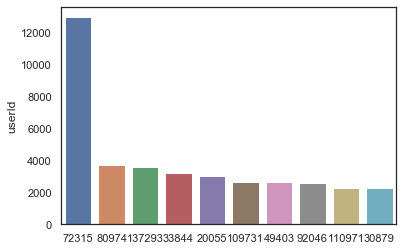

In [ ]:
# Which users have rated the most movies?
data = train_df['userId'].value_counts().head(10)
sns.barplot(x = data.index, y = data, order= data.index)
# User 72315 has a substantially large number of rated movies. This means that a matrix of movie ratings would be about 13000 rows

In [ ]:
eda_df = train_df[train_df['userId']!=72315] # For the purposes of EDA, this user is an outlier and will be removed
eda_df['rating'] = eda_df['rating'].astype('float')

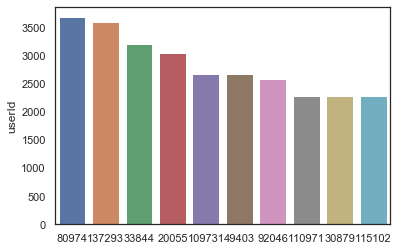

In [ ]:
data = eda_df['userId'].value_counts().head(10)
sns.barplot(x = data.index, y = data, order= data.index)

In [ ]:
eda_df['rating'].mean(), eda_df['rating'].median()

(3.5339671151324823, 3.5)

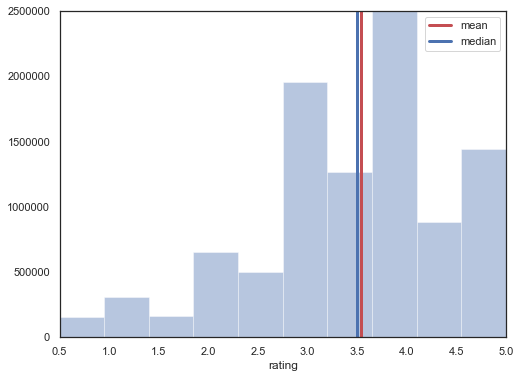

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(eda_df['rating'],bins=10, kde=False)
plt.axvline(x=eda_df['rating'].mean(), label = 'mean' , color='r', lw=3,)
plt.axvline(x=eda_df['rating'].median(), label = 'median' , color='b', lw=3)
plt.xlim((0.5,5))
plt.ylim((0,2500000))
plt.legend()


plt.show()

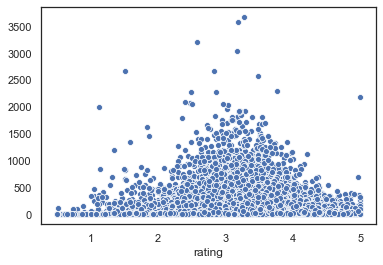

In [ ]:
# Mean user ratings
mean_ratings = eda_df.groupby('userId')['rating'].mean()
user_counts = eda_df.groupby('userId')['movieId'].count().values
sns.scatterplot(x=mean_ratings, y = user_counts)
plt.show()

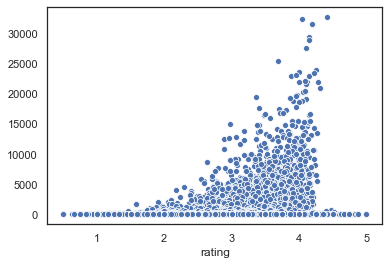

In [ ]:
# Mean movie ratings
mean_ratings = eda_df.groupby('movieId')['rating'].mean()
rating_counts = eda_df.groupby('movieId')['userId'].count().values
sns.scatterplot(x = mean_ratings, y = rating_counts,)
plt.show()

In [ ]:
def plot_ratings(count, n, best=True, method='mean'):
    # What are the best and worst movies
    # Creating a new DF with mean and count
    if method == 'mean':
        movie_avg_ratings = pd.DataFrame(eda_df.join(movies_df, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].mean())
    else:
        movie_avg_ratings = pd.DataFrame(eda_df.join(movies_df, on='movieId', how='left').groupby(['movieId', 'title'])['rating'].median())
    movie_avg_ratings['count'] = eda_df.groupby('movieId')['userId'].count().values
    movie_avg_ratings.reset_index(inplace=True)
    movie_avg_ratings.set_index('movieId', inplace=True)

    # Remove movies that have been rated fewer than n times
    data = movie_avg_ratings[movie_avg_ratings['count']>count]
    data.sort_values('rating', inplace= True,ascending=False)
    if best == True:
        plot = data.head(n).sort_values('rating', ascending=True)
        title='best rated'
    else:
        plot = data.tail(n).sort_values('rating', ascending=False)
        title='worst rated'
    plt.figure(figsize=(6,10))
    sns.scatterplot(x=plot['rating'], y=plot['title'], size=plot['count'])
    plt.title(f'{n} {title} movies with over {count} ratings\n')
    plt.show()

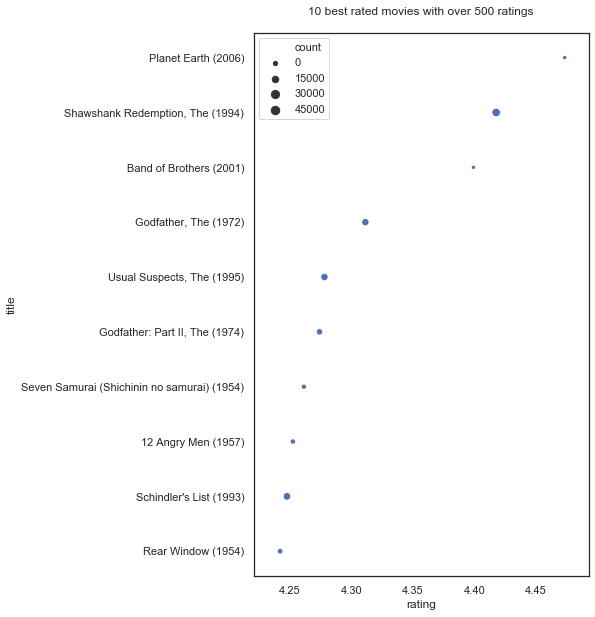

In [ ]:
# What are the top 10 highest rated titles?
plot_ratings(500, 10, True, 'mean')

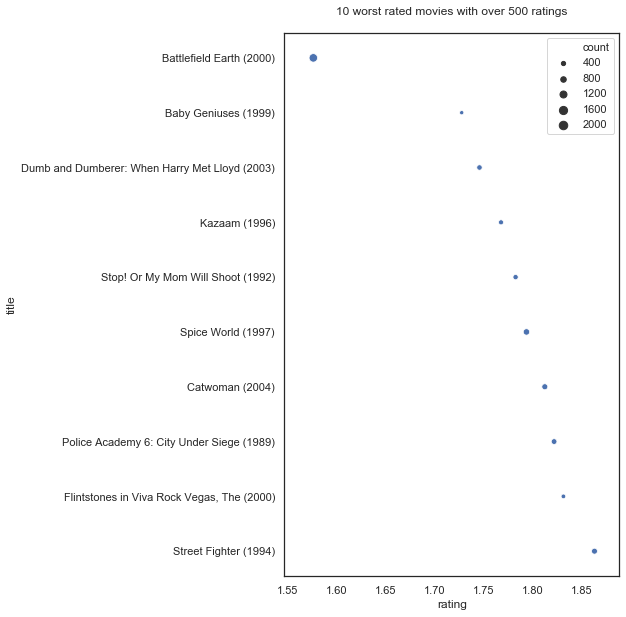

In [ ]:
# What are the 10 worst rated titles?
plot_ratings(500, 10, False, 'mean')

### Genres

In [ ]:
def feat_extractor(df, col):
    df.fillna("", inplace=True)
    feat_set = set()
    for i in range(len(df[f'{col}'])):
        for feat in df[f'{col}'].iloc[i].split('|'):
            feat_set.add(feat)
    return sorted([feat for feat in feat_set if feat != ""])

In [ ]:
genres = feat_extractor(movies_df, 'genres')

Which genres are the most frequent?

In [ ]:
def genre_frequency(df):
    # Creat a dict to store values
    genre_dict = {'genre': list(),
                 'count': list(),}
    # Retrieve a list of all possible genres
    for movie in range(len(df)):
        gens = df['genres'].iloc[movie].split('|')
        for gen in gens:
            if gen not in genre_dict['genre']:
                genre_dict['genre'].append(gen)
    # count the number of occurences of each genre
    for genre in genre_dict['genre']:
        count = 0
        for movie in range(len(df)):
            gens = df['genres'].iloc[movie].split('|')
            if genre in gens:
                count += 1
        genre_dict['count'].append(count)
        
        # Calculate metrics
        
    return genre_dict
genre_frequencies = genre_frequency(movies_df)

In [ ]:
data = pd.DataFrame(genre_frequencies)
data.sort_values(by = 'count', ascending=False)

,genre,count
6,Drama,25606
3,Comedy,16870
9,Thriller,8654
5,Romance,7719
7,Action,7348
10,Horror,5989
14,Documentary,5605
8,Crime,5319
19,(no genres listed),5062
0,Adventure,4145


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

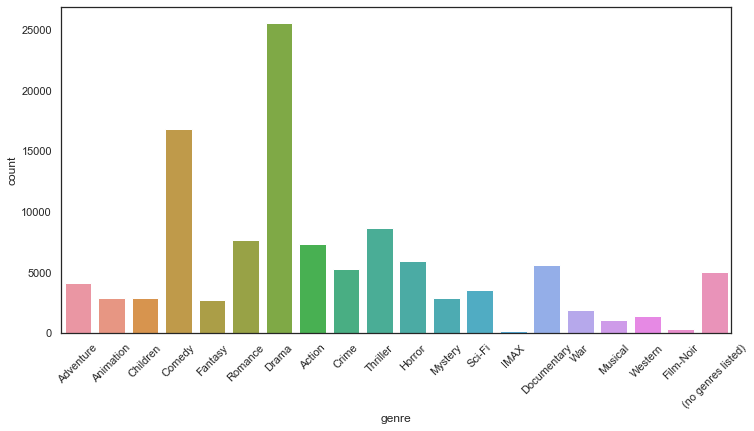

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x = data['genre'], y = data['count'])
plt.xticks(rotation=45)

Drama is the most frequently occuring genre in the database. Approximately 5000 movies have missing genres. We can use the IMDB and TMDB ID's together with the APIs to fill missing data. Further, IMAX is not a genre but rather a proprietary system for mass-viewings.

The above figure does not tell us anything about the popularity of the genres, lets calculate a mean rating and append it to the Data

In [ ]:
mean_ratings = pd.DataFrame(eda_df.join(movies_df, on='movieId', how='left').groupby(['movieId'])['rating'].mean())
movie_eda = movies_df.copy()
movie_eda = movie_eda.join(mean_ratings, on = 'movieId', how = 'left')

In [ ]:
movie_eda['rating'].isnull().sum()

16579

In [ ]:
# Fill missing ratings with meean rating
movie_eda['rating'] = movie_eda['rating'].fillna(movie_eda['rating'].mean())

In [ ]:
means = []
for genre in data['genre']:
    mean = round(movie_eda[movie_eda['genres'].str.contains(genre)]['rating'].mean(),2)
    means.append(mean)
data['mean_rating'] = means

In [ ]:
data = data.sort_values(by ='mean_rating', ascending=False).set_index('genre')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text xticklabel objects>)

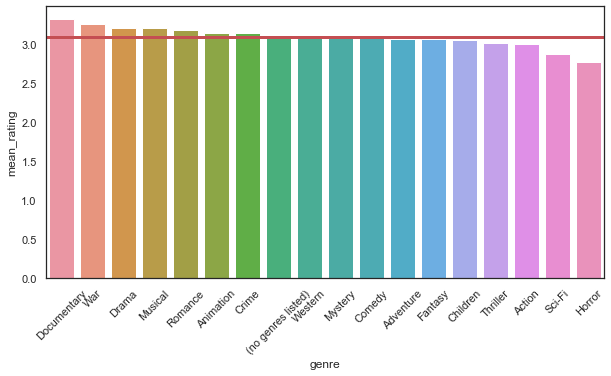

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x = data[data['count']>500].index, y = data[data['count']>500]['mean_rating'], order = data[data['count']>500].index,)
plt.axhline(y=data[data['count']>500]['mean_rating'].mean(), label = 'mean' , color='r', lw=3,)
plt.xticks(rotation=45)

Film-Noir describes Hollywood crime dramas, particularly those that emphasize cynical attitudes and sexual motivations. The 1940s and 1950s are generally regarded as the "classic period" of American film-noir. These movies have the highest ratings but this may be as a result of it's niche audence. The same logic can be applied to IMAX movies, as such, we will only include genres with a count of 500 or more.

The scores are almost evenly distributed with the exceptions of Documentaries, Ware, Drama, Musicals, Romance, and Thriller, Action, Sci-Fi, Horror, which rate higher than average and below average respectively.

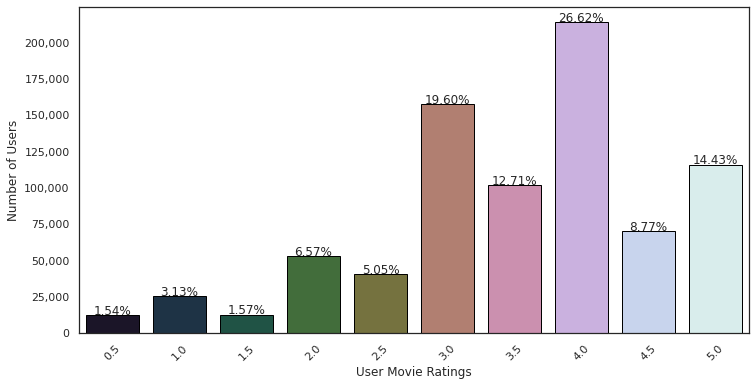

In [7]:
movieRatingDistGroup = train_df['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=movieRatingDistGroup, x='index', y='rating', palette="cubehelix", edgecolor="black", ax=ax)
ax.set_xlabel("User Movie Ratings")
ax.set_ylabel('Number of Users')
ax.xaxis.set_tick_params(rotation=45)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRatingDistGroup['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+350, '{0:.2%}'.format(height/total), ha="center") 
plt.show()

Percentage of users per rating, most movies get a rating of 4.0.

In [ ]:
data

,count,mean_rating
genre,,
Film-Noir,353,3.37
Documentary,5605,3.32
War,1874,3.26
IMAX,195,3.25
Drama,25606,3.21
Musical,1054,3.21
Romance,7719,3.18
Animation,2929,3.15
Crime,5319,3.14


In [ ]:
movies_df[movies_df['genres']=='(no genres listed)']

,title,genres
movieId,,
83773,Away with Words (San tiao ren) (1999),(no genres listed)
84768,Glitterbug (1994),(no genres listed)
86493,"Age of the Earth, The (A Idade da Terra) (1980)",(no genres listed)
87061,Trails (Veredas) (1978),(no genres listed)
91246,Milky Way (Tejút) (2007),(no genres listed)
...,...,...
209101,Hua yang de nian hua (2001),(no genres listed)
209103,Tsar Ivan the Terrible (1991),(no genres listed)
209133,The Riot and the Dance (2018),(no genres listed)


In [ ]:
train_df

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [ ]:
genome_scores

,tagId,relevance
movieId,,
1,1,0.02875
1,2,0.02375
1,3,0.06250
1,4,0.07575
1,5,0.14075
...,...,...
206499,1124,0.11000
206499,1125,0.04850
206499,1126,0.01325


In [ ]:
## Move to EDA
# How many unique users, movies, and ratings are there
train_df.nunique()

userId        162541
movieId        48213
rating            10
timestamp    8795101
dtype: int64

<a id="preprocessing"></a>
## 5. Data Preprocessing

<a id="modelling"></a>
## 6. Modelling

<a id="evaluation"></a>
## 7. Performance Evaluation

<a id="analysis"></a>
## 8. Model Analysis

<a id="conclusion"></a>
## 9. Conclusion

## 10. References
<a id="ref1"></a>[1] Ansari, A. (n.d.). Internet Recommendation Systems. Retrieved August/September, 2000, from https://www0.gsb.columbia.edu/mygsb/faculty/research/pubfiles/385/Internet Recommendation Systems.pdf

<a id="ref2"></a>[2] Shi, C. (2017, June 27). A Hybrid Recommender with Yelp Challenge. Retrieved from https://nycdatascience.com/blog/student-works/yelp-recommender-part-1/

<a id="save"></a>
## 10. Save Output

In [ ]:
# Create Kaggle Submission File
# results.to_csv("Team_RM4_submission.csv", index=False)

In [ ]:
# print("\nResults\nConfusion matrix \n {}".format(confusion_matrix(y_val, y_pred)))
# f1 = f1_score(y_val, y_pred,average="macro")
# precision = precision_score(y_val, y_pred,average="macro")
# recall = recall_score(y_val, y_pred,average="macro")
# params = {"random_state": 42,
#           "model_type": "svc",
#           "param_grid": "str(param_grid)",
#           "stratify": True,
#           }
# metrics = {"f1": f1,
#            "recall": recall,
#            "precision": precision
#            }

# experiment.log_parameters(params)
# experiment.log_metrics(metrics)
# experiment.end()

In [ ]:
# experiment.display()

[Back to top ↑](#top)